In [1]:
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("ticks")

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 2)

In [2]:
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

def figure_numbering(text): 
    artist = AnchoredText(text,
                      prop=dict(size=12), frameon=False,
                      loc=2, #  2: upper left 
                      )
    return artist

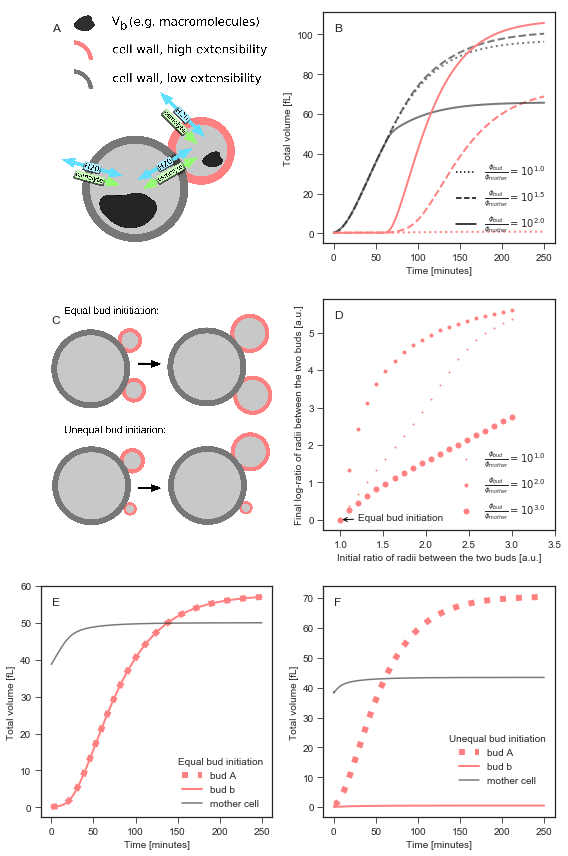

In [56]:
volume_two_buds = te.loada('volume_two_buds.txt')
volume_two_buds.integrator.relative_tolerance = 1e-10

#volume_two_buds.timeCourseSelections = ['time', 'bud_a_r_os','bud_b_r_os','mother_r_os','mother_pi_t','bud_a_pi_t']
#volume_two_buds.timeCourseSelections = ['time', 'bud_a_V_os','bud_b_V_os','mother_V_os']
volume_two_buds.timeCourseSelections = ['time', 'bud_a_V_tot_fl','bud_b_V_tot_fl','mother_V_tot_fl']
#volume_two_buds.timeCourseSelections = ['time', 'bud_a_R_ref','bud_b_R_ref','mother_R_ref']
#volume_two_buds.timeCourseSelections = ['time', '[bud_a_c_i]','[bud_b_c_i]','[mother_c_i]']
#volume_two_buds.timeCourseSelections = ['time', 'mother_pi_t','bud_a_pi_t','bud_b_pi_t']
#V_tot_fl

bud_color='#ff8080fe'
mother_color='#333333a9'

fig = plt.figure(figsize=(8,12))
volume_two_buds.reset()
volume_two_buds['q']=1.0e2
sim = volume_two_buds.simulate(0,15000,15000)
plt.subplot(gs[2,0])
plt.gca().add_artist(figure_numbering('E'))
#plt.plot(sim['time']/60,sim['bud_a_V_tot_fl']+sim['bud_b_V_tot_fl']+sim['mother_V_tot_fl'])
plt.plot(sim['time']/60,sim['bud_a_V_tot_fl'],':',linewidth=6.,color=bud_color,label='bud A')
plt.plot(sim['time']/60,sim['bud_b_V_tot_fl'],'-',linewidth=2.,color=bud_color,label='bud b')
plt.plot(sim['time']/60,sim['mother_V_tot_fl'],color=mother_color,label='mother cell')

plt.xlabel('Time [minutes]')
plt.ylabel('Total volume [fL]')
plt.legend(title='Equal bud initiation')

volume_two_buds.reset()
volume_two_buds['q']=1.0e2
volume_two_buds['bud_a_r_os'] = 2.*volume_two_buds['bud_b_r_os']
volume_two_buds['bud_a_r_b']  = 2.*volume_two_buds['bud_b_r_b']

sim = volume_two_buds.simulate(0,15000,15000)
plt.subplot(gs[2,1])
plt.gca().add_artist(figure_numbering('F'))
#plt.plot(sim['time']/60,sim['bud_a_V_tot_fl']+sim['bud_b_V_tot_fl']+sim['mother_V_tot_fl'])
plt.plot(sim['time']/60,sim['bud_a_V_tot_fl'],':',linewidth=6.,color=bud_color,label='bud A')
plt.plot(sim['time']/60,sim['bud_b_V_tot_fl'],'-',linewidth=2.,color=bud_color,label='bud b')
plt.plot(sim['time']/60,sim['mother_V_tot_fl'],color=mother_color,label='mother cell')

plt.xlabel('Time [minutes]')
plt.ylabel('Total volume [fL]')
plt.legend(bbox_to_anchor=(0,0.1,1.,1.),loc='lower right',title='Unequal bud initiation')

def bud_init_amplification(init_ratio):
    volume_two_buds.reset()
    volume_two_buds['q']=q
    volume_two_buds['bud_b_r_os'] = init_ratio*volume_two_buds['bud_a_r_os']
    volume_two_buds['bud_b_r_b']  = init_ratio*volume_two_buds['bud_a_r_b']
    sim = volume_two_buds.simulate(0,15000,15000)
    
    return sim['bud_b_V_tot_fl'][-1]/sim['bud_a_V_tot_fl'][-1]

init_ratios = np.linspace(1.0,3,20)
#final_ratios = map(bud_init_amplification,init_ratios)
plt.subplot(gs[1,1])
plt.gca().add_artist(figure_numbering('D'))
global q
widths = [1,3,5]
for i,exponent in enumerate(np.linspace(1.,3.,3)):
    q = 10.**exponent
    plt.plot(init_ratios,np.log(map(bud_init_amplification,init_ratios)),
             'o',markersize=widths[i],color=bud_color,label=r'$\frac{\phi_{bud}}{\phi_{mother}} = 10^{%s}$'%exponent)
plt.xlabel("Initial ratio of radii between the two buds [a.u.]")
plt.ylabel("Final log-ratio of radii between the two buds [a.u.]")
plt.annotate('Equal bud initiation', xy=(1.0, 0.0), xycoords="data",xytext=(1.2,0.0),arrowprops=dict(arrowstyle="->"))
plt.xlim(0.8,3.5)
l = plt.legend(frameon = 0)
#frame = l.get_frame()
#frame.set_color('white')


##### Single Bud #############################################
plt.subplot(gs[0,1])
plt.gca().add_artist(figure_numbering('B'))
volume_mother_and_bud = te.loada('volume_mother_and_bud.txt')
volume_mother_and_bud.integrator.relative_tolerance = 1e-10
volume_mother_and_bud.timeCourseSelections = ['time', 'bud_V_tot_fl','mother_V_tot_fl']

widths = [1,2,3]
markers =[':', '--', '-']

import matplotlib.lines as mlines
lines = [None]*3

for i,exponent in enumerate(np.linspace(1.,2.,3)):
    volume_mother_and_bud.resetAll()
    volume_mother_and_bud['k_nutrient'] = 3.5e-16
    volume_mother_and_bud['k_deg_0'] = 3.8e-16
    volume_mother_and_bud['mother_phi'] = 1.0e-4
    volume_mother_and_bud['extens_factor'] = 10.**exponent #bud.phi := mother.phi*extens_factor

    sim = volume_mother_and_bud.simulate(0,15000,15000)
    #plt.plot(sim['time']/60,sim['mother_V_tot_fl']+sim['bud_V_tot_fl'],'-',color=colors[i])
    plt.plot(sim['time']/60,sim['mother_V_tot_fl'],markers[i],linewidth=2,color=mother_color)
    plt.plot(sim['time']/60,sim['bud_V_tot_fl'],markers[i],linewidth=2,color=bud_color)
    lines[i] = mlines.Line2D([], [], color='black', linestyle=markers[i], label=r'$\frac{\phi_{bud}}{\phi_{mother}} = 10^{%s}$'%exponent)
    

plt.xlabel('Time [minutes]')
plt.ylabel('Total volume [fL]')


#lines = lines.sort(reverse=True)
plt.legend(handles=lines,loc='lower right')
#plt.legend(loc='lower right')

plt.subplot(gs[0,0])
plt.gca().add_artist(figure_numbering('A'))
from PIL import Image
im = Image.open('figures/model_sketch_fluxes.svg.png')
plt.imshow(im)
plt.axis('off')

plt.subplot(gs[1,0])
plt.gca().add_artist(figure_numbering('C'))
from PIL import Image
im = Image.open('figures/two_buds.svg.png')
plt.imshow(im)
plt.axis('off')

plt.tight_layout()

plt.savefig('figures/budding_fig.png',dpi=300)
plt.savefig('figures/budding_fig.eps')
plt.show()